<a href="https://colab.research.google.com/github/gannygit/alankar_generator/blob/main/alankaar_generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Alankaar Generator

Author: Bhushan Agarwal/ Gannygit

This Colab notebook will complete a given alankaar pattern through its ascent and descent, visualise its pitch contour, render a basic humming audio of the same, and generate a MIDI file of the score. Basic familiarity with python coding as well as elementary music will be beneficial to make the most of this material.

Just read through the text, run all code cells (changing key inputs as needed), and observe the output.

##Introduction
Alankaar (alaṅkāra, अलङ्कार) literally means 'ornament', a means of beautification. It could mean different things in different contexts. In literature, it may refer to literary devices and figures of speech. In music, it could mean either of two related but distinct ideas: 1) intricate, structured patterns of notes, and 2) specific ways of using microtones. Both of these contribute majorly to the typical aesthetic quality of traditional Indian music. Here, we are working with the first one, i.e., patterns of notes.

We can make patterns out of arbitrary sequences of notes. These sequences could be of any length and contain any note in a given scale. This sequence is then transposed one step up in the scale to arrive at the next sequence, and so on until the octave has been exhausted. This forms the ascent (ārohaṇa) of the alankaar. The descent (avarohaṇa) is also derived similarly, but starting at the top and transposing downwards in steps.

For example, if we choose a three-note sequence to start with, we get the following pattern in ascent.

![ascent](https://drive.google.com/uc?id=1ZZzzX6PlOyPlfEHn735MSlX45uhyatxr)

In descent, we invert the sequence to get the following:

![descent](https://drive.google.com/uc?id=1d6FsUq6pG7z6ZBSE1Wm8Ve6yKVCf17lP)

And if we do not invert the sequence, we get the following pattern in descent.

![descent](https://drive.google.com/uc?id=1ivvrfHOWbWTbyL0MAw6WSFMd8RyogzcI)

This technique of pattern generation can be used to create paltas and merukhands too, which use more complex permutation-based methods to arrive at the starting sequence.

##Approach
We will use a layered approach to represent the musical patterns. A piece of music can be represented at different levels; we will use the following:
1. Symbolic score. This depicts the sequence of notes coded as a list (array) of numbers. We will define 0 to represent the tonic note, and all notes above and below it will be represented by the integer number of semitones separating that note from the tonic. Therefore, pa  in the middle octave will be 7, and komal dha (or dha1) in the lower octave will be -4. For example, the sequence of notes in the ascending scale of bilāval/śankarābharaṇam is [0,2,4,5,7,9,11,12].

![chromatic](https://drive.google.com/uc?id=1IJV-6RnTV54TwHcYBeIWThiVjJ2PVSgG)

| Number | Karnatic | Hindustani |Code|
| :- | :- | :- ||
|Lower octave||||
|-12|sa|sa|sa
| -11 | ri1 | komal re |re1
| -10 | ri2/ga1 | shuddh re |re2
| -9 | ri3/ga2 | komal ga |ga1
| -8 | ga3 | shuddh ga |ga2
| -7 | ma1 | shuddh ma |ma1
| -6 | ma2 | tivra ma |ma2
| -5 | pa | pa |pa
| -4 | dha1 | komal dha |dha1
| -3 | dha2/ni1 | shuddh dha |dha2
| -2 | dha3/ni2 | komal ni |ni1
| -1 | ni3 | shuddh ni |ni2
|||||
|Middle octave||||
|0|sa|sa|Sa
| 1 | ri1 | komal re |Re1
| 2 | ri2/ga1 | shuddh re |Re2
| 3 | ri3/ga2 | komal ga |Ga1
| 4 | ga3 | shuddh ga |Ga2
| 5 | ma1 | shuddh ma |Ma1
| 6 | ma2 | tivra ma |Ma2
| 7 | pa | pa |Pa
| 8 | dha1 | komal dha |Dha1
| 9 | dha2/ni1 | shuddh dha |Dha2
| 10 | dha3/ni2 | komal ni |Ni1
| 11 | ni3 | shuddh ni |Ni2
|||||
|Upper octave||||
|12|sa|sa|SA
| 13 | ri1 | komal re |RE1
| 14 | ri2/ga1 | shuddh re |RE2
| 15| ri3/ga2 | komal ga |GA1
| 16 | ga3 | shuddh ga |GA2
| 17 | ma1 | shuddh ma |MA1
| 18 | ma2 | tivra ma |MA2
| 19 | pa | pa |PA
| 20 | dha1 | komal dha |DHA1
| 21 | dha2/ni1 | shuddh dha |DHA2
| 22 | dha3/ni2 | komal ni |NI1
| 23 | ni3 | shuddh ni |NI2


2. Directed graph. This is the graphical representation of the symbolic score. Here, we visualise the phrases as a directed graph where each vertex represents a note, and the vertices are connected with arrows, as shown above. Here, the y axis represents the relative pitch of each note, and the x axis represents time (not necessarily to scale). This graph helps understand the phrase structure, i.e., where a phrase begins and ends, and how the notes are connected in succession.
3. Pitch contour. This is a way to visualise how pitch varies over time. The x axis represents time, and the y axis represents the fundamental frequency (on a log scale). We are using fundamental frequency as a proxy for pitch. We need to specify the tempo in bpm (beats per minute), which will determine the duration of each note, taken here to be one beat/mātrā. All notes will be straight and disconnected from each other (without gamaka).
4. Audio. For now, we will generate only a humming sound using pure sine tones.
5. MIDI file. MIDI is short for Musical Instrument Digital Interface. Devices that that make and control sound — such as synthesizers, samplers, and computers  — communicate with each other using MIDI messages. We will create a MIDI file here that can be played using a MIDI player/synthesiser.

##Symbolic score
To generate the symbolic score, we need to specify the following:
1. Scale. Assuming a sampūrṇa-sampūrṇa scale, we need to specify the notes in the ascent and descent.
2. Pattern. We need to specify the pattern of the first set of the ascent, and the other sets and the corresponding descending ones will be generated automatically.
3. We may additionally specify whether we want the ascent, descent, or both.
4. If we choose to invert the pattern in descent, the relationships between notes are recalculated by taking the upper sa as the reference and numbering each note from there. For example, in bhairav/māyāmālavagauḻa, the pattern 0,1,4 (representing Sa, Re1, Ga2) would be inverted to 12,11,8 (representing SA, Ni2, Dha1). Without inversion, the descent would start with 12,13,16 (representing SA, RE1, GA3 [in the upper octave], which is an octave above the original pattern).

In [ ]:
pip install mido

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 5.2 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.0
    Uninstalling packaging-24.0:
      Successfully uninstalled packaging-24.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
import mido
from mido import MidiFile, MidiTrack, Message, MetaMessage

We will first define a dictionary to convert letter notes into numbers:

In [ ]:
note_levels = {
    "sa":-12, "re1":-11, "re2":-10, "ga1":-9, "ga2":-8, "ma1":-7,"ma2":-6,
    "pa":-5, "dha1":-4, "dha2":-3, "ni1":-2, "ni2":-1,
    "Sa": 0, "Re1":1, "Re2": 2, "Ga1":3, "Ga2": 4, "Ma1": 5, "Ma2":6,
    "Pa": 7, "Dha1":8, "Dha2": 9, "Ni1":10, "Ni2": 11,
    "SA": 12, "RE1":13, "RE2": 14, "GA1":15, "GA2": 16, "MA1":17, "MA2":18,
    "PA":19, "DHA1":20, "DHA2":21, "NI1":22, "NI2":23
}

Now we will define our scale and pattern, along with a few other parameters.

In [ ]:
# specifying the scale
scale = ["Sa", "Re2", "Ga2", "Ma1", "Pa", "Dha2", "Ni2"] # change as required; only notes between Sa (0) and Ni2 (11) in ascending order
# for now, we will assume melakarta raga, so ascent and descent have the same notes

In [ ]:
# specifying the pattern
pattern = ["Sa","Re2","Ga2"] # change as required; only integer values between -12 and 23
include_ascent = True # change as required
include_descent = False # change as required
invert_pattern = True # change as required

In [ ]:
# converting letter notes into numbers
ascent = np.asarray(list(note_levels[note] for note in scale))
available_notes = np.append((ascent-12),[ascent, ascent+12]) # all notes from lower octave sa to upper octave ni
pattern = np.asarray(list(note_levels[note] for note in pattern))

In [ ]:

def generate_ascent(pattern):
    current_pattern = pattern
    score = [current_pattern]
    while current_pattern[-1]!=12:
        current_pattern = plus_one(current_pattern)
        score = np.concatenate((score,[current_pattern]))
    return score,current_pattern

def generate_descent(pattern,invert_pattern = True):
    if invert_pattern:
        pattern = flip(pattern)
    else:
        ascent_pattern, pattern = generate_ascent(pattern)
    current_pattern = pattern
    score = [current_pattern]
    while current_pattern[-1]!=0:
        current_pattern = minus_one(current_pattern)
        score = np.concatenate((score,[current_pattern]))
    return(score)

def plus_one(pattern):
    indices = np.asarray([])
    for item in pattern:
        index = np.where(available_notes == item)[0]
        index += 1
        indices = np.append(indices,index)
    return(available_notes[indices.astype(int)])

def minus_one(pattern):
    indices = np.asarray([])
    for item in pattern:
        index = np.where(available_notes == item)[0]
        index -= 1
        indices = np.append(indices,index)
    return(available_notes[indices.astype(int)])

def flip(pattern):
    index_tonic = np.where(available_notes == 0)[0]
    index_octave = np.where(available_notes == 12)[0]
    flip_indices = np.asarray([])
    for item in pattern:
        index = np.where(available_notes == item)[0]
        diff = index - index_tonic
        new_index = index_octave - diff
        flip_indices = np.append(flip_indices,new_index)
    return(available_notes[flip_indices.astype(int)])

def alankar_score(pattern,include_ascent = True,include_descent = True,invert_pattern = True):
    if include_ascent:
        ascent, x = generate_ascent(pattern)
        score = ascent
    if include_descent:
        descent = generate_descent(pattern,invert_pattern)
        score = descent
    if include_ascent and include_descent:
        score = np.concatenate((ascent,descent))
    return score


In [ ]:
def get_key(val):

    for key, value in note_levels.items():
        if val == value:
            return key

    return float("nan")

Example

In [ ]:
score = alankar_score(pattern,include_ascent,include_descent,invert_pattern)
disp_score = []
for row in score:
    phrase = []
    for value in row:
        phrase = np.append(phrase,get_key(value))
    #print(phrase)
    if len(disp_score) == 0:
        disp_score = [np.concatenate((disp_score,phrase))]
    else:
        disp_score = np.concatenate((disp_score,[phrase]))
    #print(disp_score)

print(disp_score)

[['Sa' 'Re2' 'Ga2']
 ['Re2' 'Ga2' 'Ma1']
 ['Ga2' 'Ma1' 'Pa']
 ['Ma1' 'Pa' 'Dha2']
 ['Pa' 'Dha2' 'Ni2']
 ['Dha2' 'Ni2' 'SA']]


Example

In [ ]:
new_pattern_ = ["Sa","ni2","Re2"] # change as required
new_pattern_ = np.asarray(list(note_levels[note] for note in new_pattern_))

score = alankar_score(new_pattern_,include_ascent,include_descent,invert_pattern)
disp_score = []
for row in score:
    phrase = []
    for value in row:
        phrase = np.append(phrase,get_key(value))
    #print(phrase)
    if len(disp_score) == 0:
        disp_score = [np.concatenate((disp_score,phrase))]
    else:
        disp_score = np.concatenate((disp_score,[phrase]))
    #print(disp_score)

print(disp_score)

[['Sa' 'ni2' 'Re2']
 ['Re2' 'Sa' 'Ga2']
 ['Ga2' 'Re2' 'Ma1']
 ['Ma1' 'Ga2' 'Pa']
 ['Pa' 'Ma1' 'Dha2']
 ['Dha2' 'Pa' 'Ni2']
 ['Ni2' 'Dha2' 'SA']]


##Directed graph

For this, we will use a python library called `networkx`.

Each note is assigned a unique vertex, and notes in a phrase are connected using arrows (directed graph). The beginning (first note) and end (last note) of a phrase are marked as gṛha and nyāsa notes and are coloured green and red, respectively.


In [ ]:
import networkx as nx

In [ ]:
def construct_graph_from_phrases(phrases):
    G = nx.DiGraph()

    # Create Nodes and Edges for Each Phrase
    for phrase_index, phrase in enumerate(phrases):
        for note_index, note in enumerate(phrase):
            node_id = f"{note}_{phrase_index}_{note_index}"
            is_griha = (note_index == 0)
            is_nyasa = (note_index == len(phrase) - 1)

            G.add_node(node_id, note=note, is_griha=is_griha, is_nyasa=is_nyasa)

            if note_index > 0:
                prev_note = phrase[note_index - 1]
                prev_node_id = f"{prev_note}_{phrase_index}_{note_index-1}"
                G.add_edge(prev_node_id, node_id)


    return G

In [ ]:
G = construct_graph_from_phrases(disp_score)

In [ ]:
def visualize_graph(graph, disp_score, note_levels):
    pos = {node: (i, note_levels[attrs["note"]]) for i, (node, attrs) in enumerate(graph.nodes(data=True))}

    plt.figure(figsize=(12,6))

    # Draw the full graph
    #nx.draw(graph, pos, with_labels=True, node_color='lightgrey', node_size=35, font_size=10, arrows=True)

    # Highlight griha and nyasa notes
    nyasa_nodes = [node for node, attrs in graph.nodes(data=True) if (attrs["is_nyasa"] and not attrs["is_griha"])]
    griha_nodes = [node for node, attrs in graph.nodes(data=True) if (attrs["is_griha"] and not attrs["is_nyasa"])]
    mix_nodes = [node for node, attrs in graph.nodes(data=True) if (attrs["is_griha"] and attrs["is_nyasa"])]
    other_nodes = [node for node in graph.nodes() if node not in griha_nodes and node not in nyasa_nodes and node not in mix_nodes]

    # grid lines/ reference lines for visualisation
    x = np.arange(len(graph.nodes))



    plotted = []
    for phrase in disp_score:
        for note in phrase:
            if note not in plotted:
                if note_levels[note] in [-5,0,7,12,19]:
                    plt.plot(x,(note_levels[note]+x*0),color='green')
                else:
                    plt.plot(x,(note_levels[note]+x*0),color='grey',linewidth=0.5)
                plotted = np.append(plotted,note)


    nx.draw_networkx_nodes(graph, pos, nodelist=griha_nodes, node_color='green', node_size=100, label='Griha Notes')
    nx.draw_networkx_nodes(graph, pos, nodelist=nyasa_nodes, node_color='red', node_size=100, label='Nyasa Notes')
    nx.draw_networkx_nodes(graph, pos, nodelist=mix_nodes, node_color='cyan', node_size=100, label='Mix Notes')
    nx.draw_networkx_nodes(graph, pos, nodelist=other_nodes, node_color='lightblue', node_size=100, label='Other Notes')

    # draw edges
    nx.draw_networkx_edges(graph, pos, edgelist=graph.edges, arrowstyle='-|>', arrowsize=10)

    # Draw node labels with note names
    #note_labels = {node: attrs["note"] for node, attrs in graph.nodes(data=True)}
    #nx.draw_networkx_labels(graph, pos, labels=note_labels, font_size=10, font_color='black')


    # add a legend
    #plt.legend(scatterpoints=1, loc='upper left')

    # Show the plot
    #plt.title("Musical Phrase Graph")
    plt.title("Score as a graph")
    plt.show()

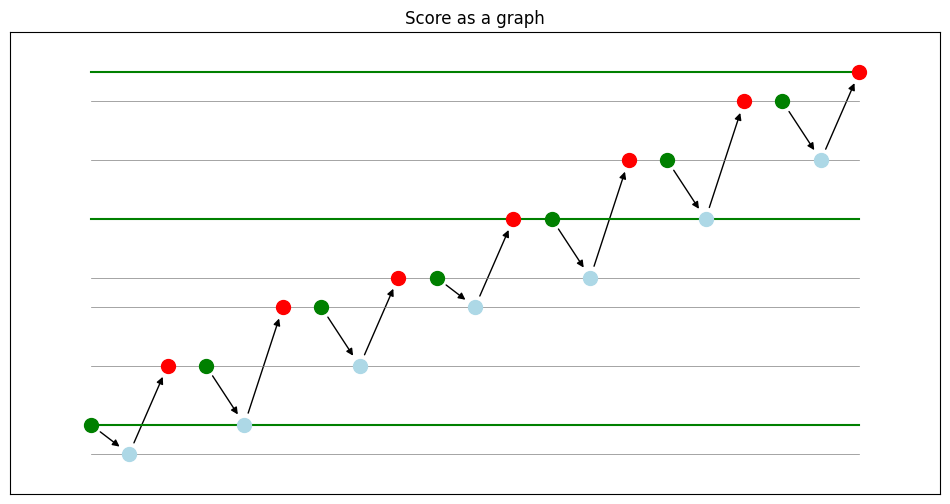

In [ ]:
# visualize the graph
visualize_graph(G, disp_score, note_levels)

##Pitch contour
To derive the pitch contour from the symbolic score, we need to specify the fundamental frequency of the tonic ($f_0$), i.e., the middle sa, and the tuning of our scale. We also need to specify the tempo $T$ in beats per minute (bpm). The tonic is usually specified as a note instead of a frequency. We can use the following code to convert that into a frequency.

In [ ]:
tonic_note = 'C3' # change as required

In [ ]:
# calculate tonic frequency from tonic note:
def note_to_freq(note):
    if len(note) < 2 or len(note) > 3 or note[0] < 'A' or note[0] > 'G':
        return 0
    if len(note) == 3:
        if note[1] == 'b':
            acc = -1
        elif note[1] == '#':
            acc = 1
        else:
            return 0
        octave = int(note[2])
    else:
        acc = 0
        octave = int(note[1])
    SEMITONES = {'A': 0, 'B': 2, 'C': -9, 'D': -7, 'E': -5, 'F': -4, 'G': -2}
    n = 12 * (octave - 4) + SEMITONES[note[0]] + acc
    f = 440 * (2 ** (float(n) / 12.0))
    #print note, f
    return f,n

In [ ]:
tonic_f, n = note_to_freq(tonic_note)
c_n = [0,0,0,0,0,0,0] # fine tuning in cents; changed as required
bpm = 80 # tempo in bpm

With the tonic at $f_0$, the frequency of any note represented by $n$ in the symbolic score is given by
$$f_n = 2^{\frac{(100n+c_n)}{1200}}\cdot f_0$$
where $c_n$ is the fine-tuning of note $n$ in cents, which is 0 by default.

At a tempo of $T$ bpm, the duration (in seconds) of each note is given by
$$\frac{60}{T}$$

From this information, we can derive the pitch contour of the score by plotting straight lines for each note at the corresponding frequency and for the corresponding duration. For now, we will assume that there are no gamakas (straight notes and abrupt transitions). We will also assume that there are no breaks, and that all notes have the same duration.

###Discrete pitch contours
The pitch contour contains discrete points that specify the value of the fundamental frequency at a given point in time. For this, we need to consider the spacing between these points.
Consider a sampling rate of 44.1 KHz. This means there are 44100 samples in 1 second of audio. From this audio, if we were to compute a spectrogram using a hop size of 256 samples, we would get 44100/256 (~172) frames per 1 second of audio. Each frame gives us a point on the pitch contour. Thus, the duration $t$ of each point on the pitch contour is given by
$$t=\frac{N_{hop}}{f_s}$$
where $f_s$ is the sampling rate, and $N_{hop}$ is the hop size used while computing the (hypothetical) spectrogram of the (hypothetical) audio. Assuming a sampling rate of 44100 and a hop size of 256 samples, the duration of each point on the pitch contour is given by 256/44100 seconds, which is approximately 0.0058 seconds.

In [ ]:
sample_rate = 44100 # default
hop_size = 256

In [ ]:
score = alankar_score(new_pattern_,include_ascent,include_descent,invert_pattern).flatten()
def pitch_contour(score,bpm):
    contour_total = np.asarray([])
    for note in score:
        contour_note = generate_contour(freq(note,c_n),bpm)
        contour_total = np.append(contour_total,contour_note)
    return contour_total

def generate_contour(f,bpm):
    duration = 60/bpm
    frame_duration = hop_size/sample_rate
    num_frames = int(duration/frame_duration)
    #time = np.arange(0,duration,frame_duration)
    time = np.linspace(0,duration,num_frames)
    contour = np.asarray([])
    frequency = np.asarray([f])
    for t in time:
        contour = np.append(contour,frequency)
    return contour

def freq(note,c_n):
    f = tonic_f * 2**((100*note+cents(note,c_n))/1200)
    return f

def cents(note,c_n):
    if 0<=note<=11:
        index = np.where(ascent == note)[0]
        return c_n[index.astype(int)[0]]
    elif note<0:
        index = np.where(available_notes == note)[0]
        return c_n[index.astype(int)[0]]
    elif note>11:
        index = np.where(available_notes == note)[0]-14
        return c_n[index.astype(int)[0]]

In [ ]:
contour = pitch_contour(score,bpm)

In [ ]:
time = np.arange(len(contour))*hop_size/sample_rate

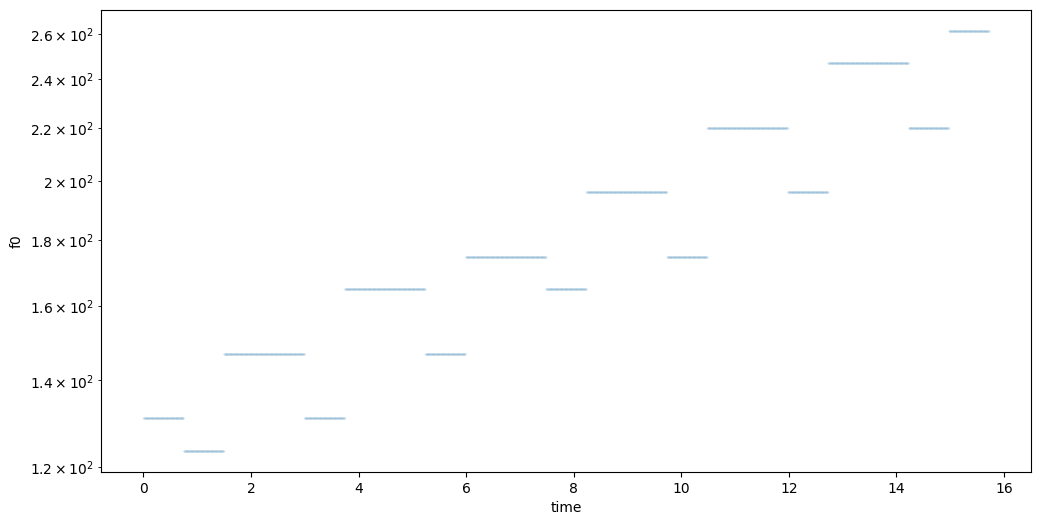

In [ ]:
plt.figure(figsize=(12,6))
plt.yscale("log")
plt.plot(time,contour,linestyle='None',marker = ".",markersize = 0.1)
plt.xlabel('time') # or 'frame', if values are not scaled by sample rate
plt.ylabel('f0')
plt.show()

##Humming
To generate a humming sound, we will use a simple sinusoidal synthesis and vary the frequency of the sinusoid as per the pitch contour.
$$x = sin(2\pi ft + \phi)$$

The phase of each sinusoid is carried forward from the previous sinusoid, wrapped each time around $2\pi$.

In [ ]:
def freq_to_sine(freq,duration,phi=0):
    time = np.linspace(0, duration, int(sample_rate * duration))
    A = 0.5 # Amplitude
    return (A*np.sin(2*np.pi*freq*time+phi),np.mod(2*np.pi*freq*time[-1]+phi,2*np.pi))

def hum_audio(contour):
    hum = np.asarray([])
    phi = 0
    for f in contour:
        duration = hop_size/sample_rate
        wave,phi = freq_to_sine(f,duration,phi)
        hum = np.append(hum,wave)
    return(hum)

###Listening to the audio
This cell may take a while to run, upto a minute. Reduce the volume to avoid blaring speakers.

In [ ]:
signal = hum_audio(contour)
ipd.Audio(signal, rate=sample_rate)

##MIDI

A MIDI file contains a series of messages that indicate when to turn on or off a note. Using our numerically coded symbolic score, we can write a MIDI file with the help of mido library. This code will create a MIDI file; you can listen to it using an external MIDI player/synthesiser. For example, you can play it using Windows Media Player or upload it to [onlinesequencer](https://onlinesequencer.net/) and listen.

In [ ]:
def create_midi_file(MIDI_score, ascent, c_n, tonic_note, bpm = 80):

    temp=int(1000000*60/bpm)

    # Create a MIDI file and a track
    midi_file = MidiFile()
    track = MidiTrack()
    midi_file.tracks.append(track)

    # Set the instrument (program) for the track (optional)
    track.append(Message('program_change', program=0, time=0))

    # Set the tempo
    track.append(MetaMessage('set_tempo', tempo=temp, time=0))

    bend_value = 0
    # Add note-on and note-off messages for each note
    for note_pitch in MIDI_score:
        # Note On message
        track.append(Message('note_on', note=note_pitch, velocity=100, time=0))

        # Fine-tuning the pitch
        index = MIDI_note_to_index(note_pitch, ascent, tonic_note)
        if(c_n[index] != 0 or bend_value != 0):
            bend_value = int(c_n[index]*8191/200) # works only for pitch bend range of +/- 2 semitones
            track.append(Message('pitchwheel', pitch=bend_value, time=0))

        # Note Off message (assuming a duration of 1 beat for simplicity)
        track.append(Message('note_off', note=note_pitch, velocity=100, time=480))  # 480 ticks = 1 beat

    # Save the MIDI file
    return(midi_file)

def MIDI_note_to_index(note,ascent,tonic_note):
    MIDI_ascent = score_to_MIDI_score(ascent,tonic_note)
    index = int(np.where(MIDI_ascent%12 == note%12)[0])
    return index

###Converting to MIDI score
The score we used earlier was numerically coded such that the tonic in the middle octave is always coded as 0. In contrast, MIDI has a static coding, where each note has the same code irrespective of where the tonic is. This numbering starts from C0 at note number 0 and goes up to G10 at note number 127.

In [ ]:
def score_to_MIDI_score(score,tonic_note):
    MIDI_score = np.asarray([])
    tonic_f,n = note_to_freq(tonic_note)
    n = n+57 +12
    for note in score:
        MIDI_score = np.append(MIDI_score,note+n).astype(int)
    return(MIDI_score)

In [ ]:
score = alankar_score(pattern,include_ascent,include_descent,invert_pattern).flatten()
MIDI_score = score_to_MIDI_score(score, tonic_note)
midi_file = create_midi_file(MIDI_score, ascent, c_n, tonic_note,bpm)
midi_file.save('alankaar.mid')

<ipython-input-35-c760b9a9480b>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  index = int(np.where(MIDI_ascent%12 == note%12)[0])
